In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind,norm,f_oneway,chi2_contingency,shapiro,levene
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("yulu")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# OBSERVATIONS

In [3]:
df.shape

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


From the above data set we can see that there is no missing values present in the data

In [5]:
df.describe(include="all")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


# Checking Outliers

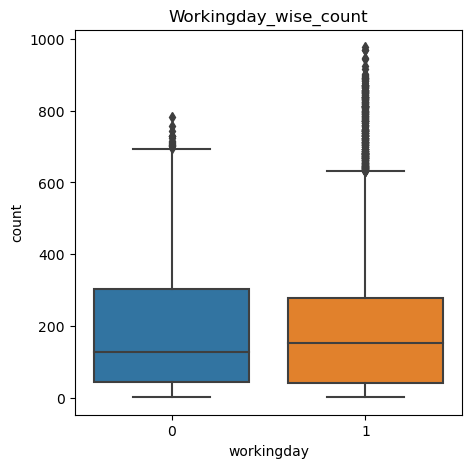

In [6]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["count"],x=df["workingday"])
plt.title("Workingday_wise_count")
plt.show()

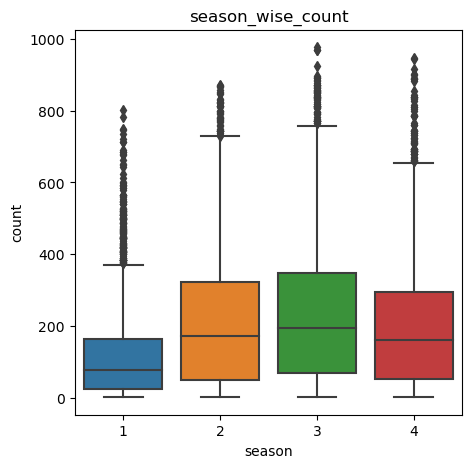

In [7]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["count"],x=df["season"])
plt.title("season_wise_count")
plt.show()

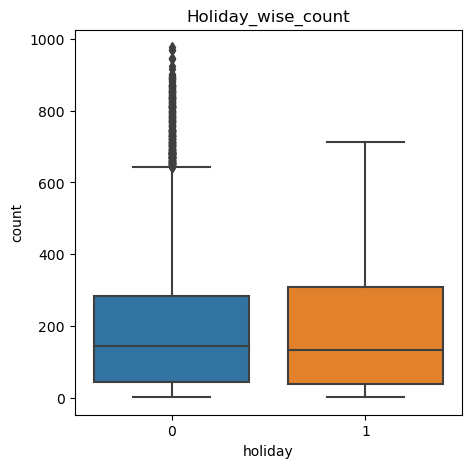

In [8]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["count"],x=df["holiday"])
plt.title("Holiday_wise_count")
plt.show()

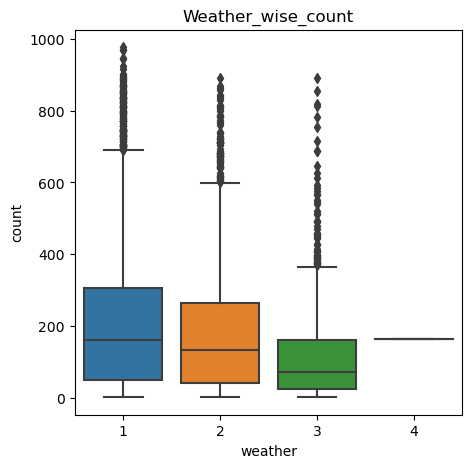

In [9]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df["count"],x=df["weather"])
plt.title("Weather_wise_count")
plt.show()

# BIVARIATE ANALYSIS

# ttest to check "Working Day has effect on number of electric cycles rented"

In [10]:
alpha_value=0.5

In [11]:
df_notworkingday=df[df["workingday"]==0]["count"]
df_notworkingday

0         16
1         40
2         32
3         13
4          1
        ... 
10809    109
10810    122
10811    106
10812     89
10813     33
Name: count, Length: 3474, dtype: int64

In [12]:
df_workingday=df[df["workingday"]==1]["count"]
df_workingday

47         5
48         2
49         1
50         3
51        30
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 7412, dtype: int64

In [13]:
tstatistic,P_value=ttest_ind(df_notworkingday,df_workingday)

In [14]:
P_value

0.22644804226361348

In [15]:
if P_value < alpha_value:
    print("reject the null hypothesis")
else:
    print("Don't reject the null hypothesis")

reject the null hypothesis


Visual Analysis "Working Day has effect on number of electric cycles rented"

In [16]:
df_notworkingday.mean()

188.50662061024755

In [17]:
df_workingday.mean()

193.01187263896384

Normality test for working and non working day 

In [21]:
statistic_value,p_value=shapiro(df_workingday)

In [22]:
p_value

0.0

In [23]:
statistic_value,p_value=shapiro(df_notworkingday)

In [24]:
p_value

4.203895392974451e-45

In [25]:
if p_value < alpha_value:
    print("working and non working will not come under normality")
else:
    print("working and non working day will come under normality ")

working and non working will not come under normality


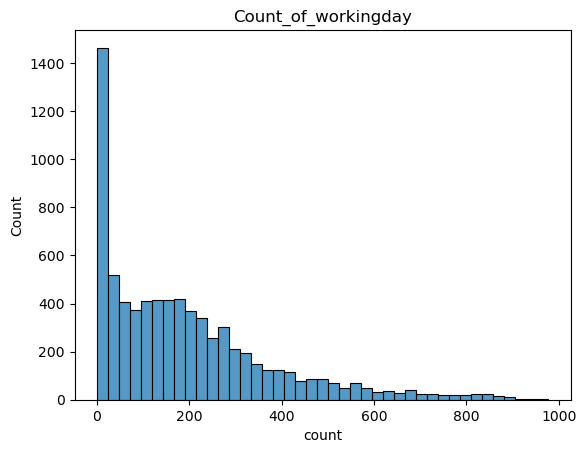

In [26]:
sns.histplot(df_workingday)
plt.title("Count_of_workingday")
plt.show()

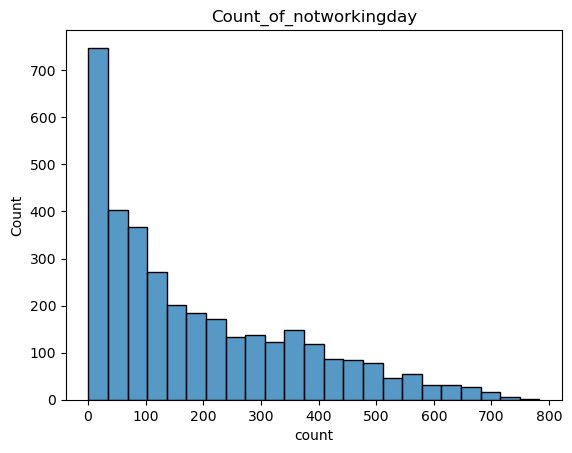

In [27]:
sns.histplot(df_notworkingday)
plt.title("Count_of_notworkingday")
plt.show()

Variance Test for Working and non working day 

In [29]:
statistic_value,p_value=levene(df_workingday,df_notworkingday)

In [30]:
p_value

0.9437823280916695

In [31]:
if P_value < alpha_value:
    print('Both Working and non working variance not are equal')
else:
    print("Both Working and non working variance are equal")

Both Working and non working variance not are equal


# No. of cycles rented similar or different in different seasons

In [32]:
season1=df[df["season"]==1]["count"]
season2=df[df["season"]==2]["count"]
season3=df[df["season"]==3]['count']
season4=df[df["season"]==4]["count"]

In [33]:
fstatistic,p_value=f_oneway(season1,season2,season3,season4)

In [34]:
p_value

6.164843386499654e-149

In [35]:
if p_value > alpha_value:
    print("the null hypothesis is that there is no difference among group means")
else:
    print("The alternative hypothesis is that at least one group differs significantly from the overall mean of the dependent variable")

The alternative hypothesis is that at least one group differs significantly from the overall mean of the dependent variable


Visual Analysis " No. of cycles rented similar or different in different seasons"

season1.mean()

In [36]:
season2.mean()

215.25137211855105

In [37]:
season3.mean()

234.417124039517

In [38]:
season4.mean()

198.98829553767374

In [39]:
season1.mean()

116.34326135517499

Normality test for working and non working day

In [40]:
shapiro(season1)

ShapiroResult(statistic=0.8087388873100281, pvalue=0.0)

In [41]:
shapiro(season2)

ShapiroResult(statistic=0.900481641292572, pvalue=6.039093315091269e-39)

In [42]:
shapiro(season3)

ShapiroResult(statistic=0.9148160815238953, pvalue=1.043458045587339e-36)

In [43]:
shapiro(season4)

ShapiroResult(statistic=0.8954644799232483, pvalue=1.1301682309549298e-39)

Graphical analysis for "season vs count"

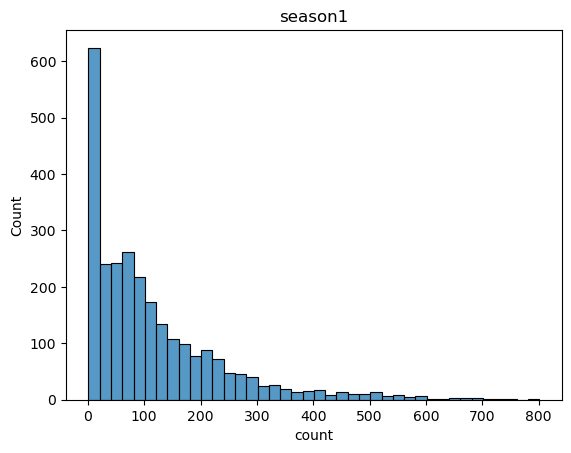

In [44]:
sns.histplot(x=season1)
plt.title("season1")
plt.show()

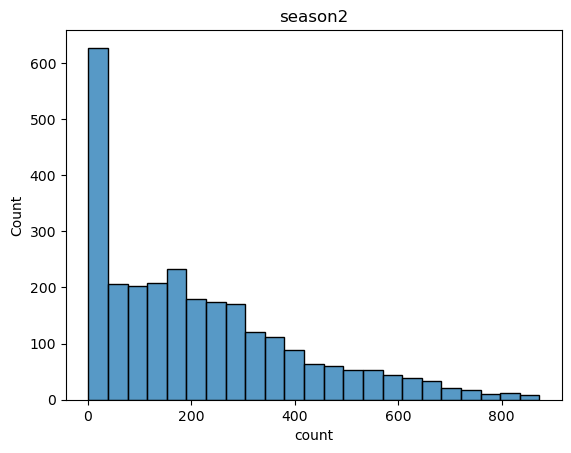

In [45]:
sns.histplot(x=season2)
plt.title("season2")
plt.show()

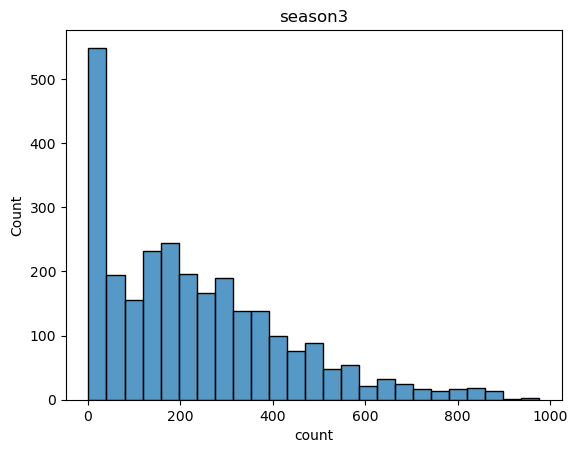

In [46]:
sns.histplot(x=season3)
plt.title("season3")
plt.show()

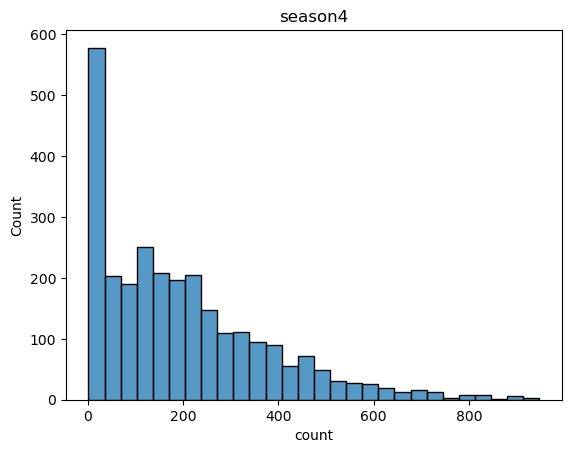

In [47]:
sns.histplot(x=season4)
plt.title("season4")
plt.show()

Variance Test for "season vs count"

In [48]:
statistic_value,p_value=levene(season1,season2,season3,season4)

In [49]:
p_value

1.0147116860043298e-118

In [50]:
if p_value < alpha_value:
    print("reject null hypothesis")
else:
    print("we don't reject null hypothesis")

reject null hypothesis


# "No. of cycles rented similar or different in different weather"

In [59]:
df_weather1=df[df["weather"]==1]["count"]

In [60]:
df_weather2=df[df["weather"]==2]["count"]

In [61]:
df_weather3=df[df["weather"]==3]["count"]

In [62]:
df_weather4=df[df["weather"]==4]["count"]

In [63]:
statistic,P_value=f_oneway(df_weather1,df_weather2,df_weather3,df_weather4)

In [64]:
P_value

5.482069475935669e-42

In [65]:
if P_value < alpha_value:
    print("Reject null hypothesis and We conclude that No of cycles is different in different weather ")
else:
    print("we don't reject the null hypothesis and we conclude that No of cycles is similar in different weather ")

Reject null hypothesis and We conclude that No of cycles is different in different weather 


Visual analysis for "No. of cycles rented similar or different in different weather"

In [66]:
df_weather1.mean()

205.23679087875416

In [67]:
df_weather2.mean()

178.95553987297106

In [68]:
df_weather3.mean()

118.84633294528521

In [69]:
df_weather4.mean()

164.0

Normality Test for Weather vs count

In [72]:
statistic_value,P_value=shapiro(df_weather1)

In [73]:
p_value

1.0147116860043298e-118

In [74]:
statistic_value,P_value=shapiro(df_weather2)

In [75]:
p_value

1.0147116860043298e-118

In [76]:
statistic_value,P_value=shapiro(df_weather3)

In [77]:
P_value

3.876090133422781e-33

Grahical analysis

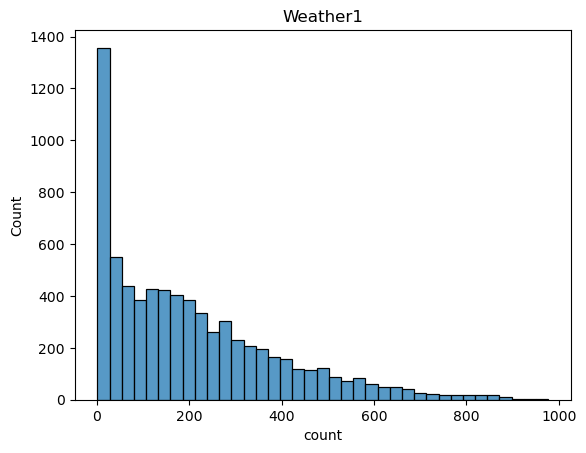

In [78]:
sns.histplot(x=df_weather1)
plt.title("Weather1")
plt.show()

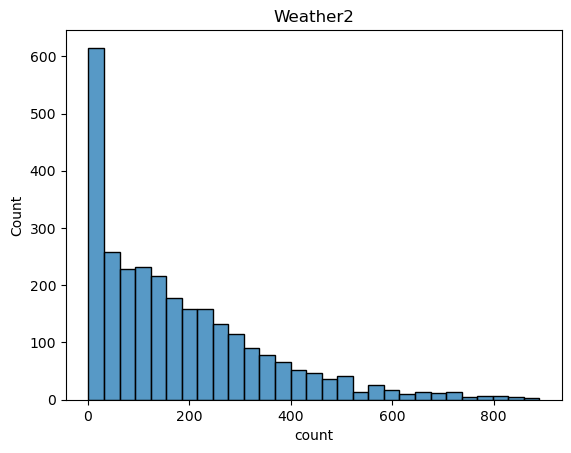

In [79]:
sns.histplot(x=df_weather2)
plt.title("Weather2")
plt.show()

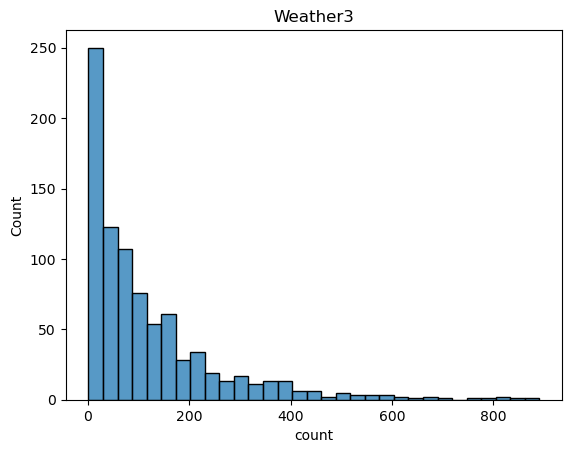

In [80]:
sns.histplot(x=df_weather3)
plt.title("Weather3")
plt.show()

Variance test for Weather vs count

In [81]:
levene(df_weather1,df_weather2,df_weather3,df_weather4)

LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)

# Weather is dependent on season 

In [82]:
df["weather"]

0        1
1        1
2        1
3        1
4        1
        ..
10881    1
10882    1
10883    1
10884    1
10885    1
Name: weather, Length: 10886, dtype: int64

In [83]:
df["season"]

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: season, Length: 10886, dtype: int64

In [84]:
pd.crosstab(df["weather"],df["season"])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [85]:
statistic_value,P_value,Dof,exp_value=chi2_contingency(pd.crosstab(df["weather"],df["season"]))

In [86]:
P_value

1.5499250736864862e-07

In [87]:
if p_value < alpha_value:
    print("We reject null hypothesis and we can conclude Weather is dependent on season.")
else:
    print("Weather is not dependent on season.")

We reject null hypothesis and we can conclude Weather is dependent on season.


In [88]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
